In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)


In [ ]:
fato_custos = pd.read_csv("/home/rodrigo/controladoria-industrial/data/processed/fato_custos_tratado.csv")

In [3]:
fato_custos.head()

,data,ano,mes,ano_mes,centro_custo,descricao,tipo,tipo_custo,categoria,valor,ajuste
0,2024-02-01,2024,2,2024-02,CC500,Administrativo,Administrativo,DIRETO,MATERIA PRIMA,"14,739.93",False
1,2024-05-17,2024,5,2024-05,CC200,Produção Linha B,Produtivo,INDIRETO,ENERGIA,"19,927.67",False
2,2023-03-31,2023,3,2023-03,CC300,Manutenção,Produtivo,INDIRETO,ENERGIA,"17,983.71",False
3,2024-12-18,2024,12,2024-12,CC200,Produção Linha B,Produtivo,INDIRETO,MAO DE OBRA,"17,042.10",False
4,2024-05-20,2024,5,2024-05,CC100,Produção Linha A,Produtivo,DIRETO,ENERGIA,"15,862.11",False


In [4]:
custo_total = fato_custos["valor"].sum()
custo_total

np.float64(8244308.380000001)

In [5]:
custos_cc = (
    fato_custos
    .groupby(["centro_custo", "descricao"])["valor"]
    .sum()
    .sort_values(ascending=False)
)

custos_cc


centro_custo  descricao       
CC300         Manutenção         1,708,803.38
CC500         Administrativo     1,612,861.16
CC200         Produção Linha B   1,608,404.60
CC100         Produção Linha A   1,457,853.69
CC400         Logística          1,423,794.34
Name: valor, dtype: float64

In [6]:
custos_tipo = (
    fato_custos
    .groupby("tipo")["valor"]
    .sum()
)

custos_tipo


tipo
Administrativo   1,612,861.16
Produtivo        6,198,856.01
Name: valor, dtype: float64

In [7]:
custos_direto_indireto = (
    fato_custos
    .groupby("tipo_custo")["valor"]
    .sum()
)

custos_direto_indireto


tipo_custo
DIRETO     3,836,495.23
INDIRETO   4,407,813.15
Name: valor, dtype: float64

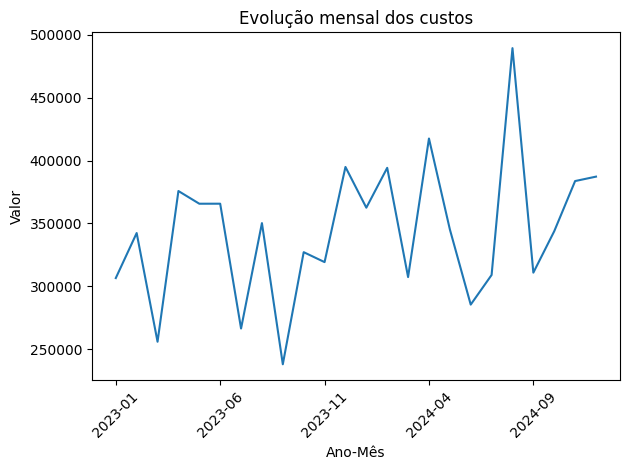

In [8]:
custos_mensais = (
    fato_custos
    .groupby("ano_mes")["valor"]
    .sum()
    .sort_index()
)

plt.figure()
custos_mensais.plot()
plt.title("Evolução mensal dos custos")
plt.xlabel("Ano-Mês")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
desvio_cc = (
    fato_custos
    .groupby(["centro_custo", "ano_mes"])["valor"]
    .sum()
    .groupby("centro_custo")
    .std()
    .sort_values(ascending=False)
    .head(5)
)

desvio_cc


centro_custo
CC100   34,290.16
CC300   30,510.20
CC500   29,358.45
CC200   28,720.46
CC400   22,201.80
Name: valor, dtype: float64

In [10]:
ajustes = fato_custos[fato_custos["ajuste"] == True]

ajustes.groupby("centro_custo")["valor"].sum()


centro_custo
CC100   48,586.49
CC200   38,498.66
CC300   49,388.77
CC400   54,167.34
CC500   22,496.34
Name: valor, dtype: float64